# **The below statistics are for MPNET model fine tuned & the dataset, which is used for finding similarity between news articles and cluster them into events**

In [ ]:
# Install necessary packages
!pip install -U sentence-transformers matplotlib seaborn scikit-learn

# Import libraries
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import accuracy_score

^C


# **Model Analytics**


📊 Cluster Assignments:
[Cluster 0] India Gets Rafale Boost, Rs 63,000-Crore Deal Cleared For 26 Navy Fighters
[Cluster 1] China says it will continue to take ‘resolute and forceful’ countermeasures as U.S. tariffs kick in
[Cluster 2] 3 dead, 3 injured in mass shooting in Virginia
[Cluster 2] Mass shooting in Chicago leaves several injured and dead
[Cluster 0] France Approves New Fighter Jet Purchase Amid Rising Tensions
[Cluster 1] US-China Trade War Intensifies as New Tariffs Imposed


<ipython-input-26-9803bfc1105d>:47: UserWarning: Glyph 129000 (\N{LARGE YELLOW SQUARE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129000 (\N{LARGE YELLOW SQUARE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


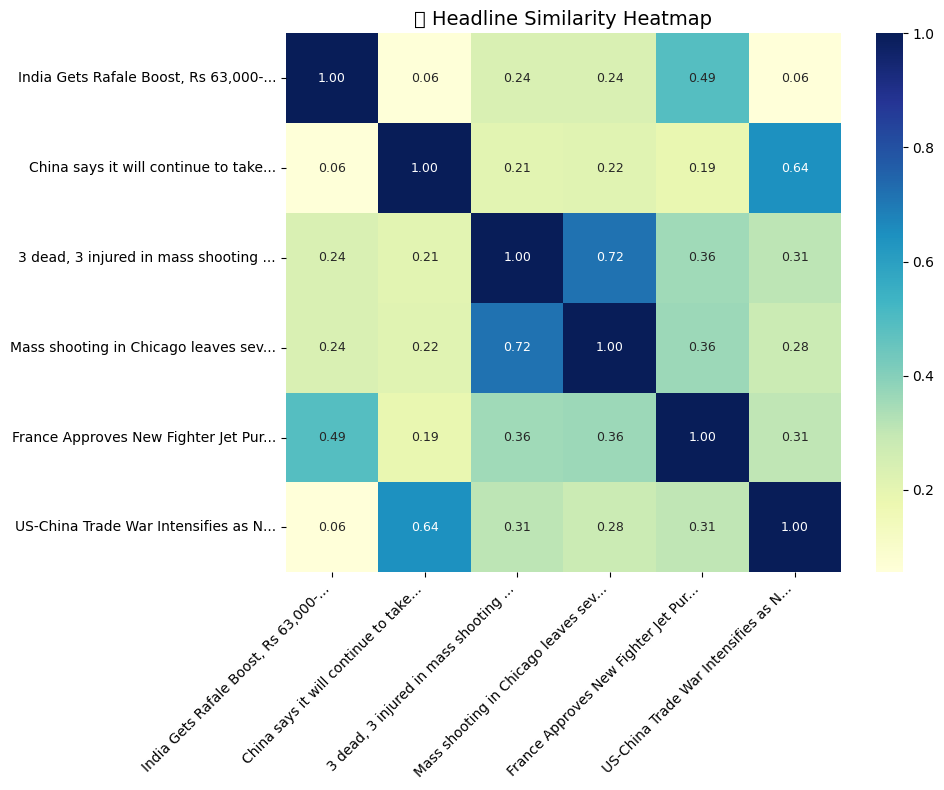


📐 Similarity Matrix (rounded):
 [[1.    0.062 0.239 0.238 0.49  0.056]
 [0.062 1.    0.209 0.218 0.188 0.644]
 [0.239 0.209 1.    0.717 0.357 0.308]
 [0.238 0.218 0.717 1.    0.364 0.279]
 [0.49  0.188 0.357 0.364 1.    0.305]
 [0.056 0.644 0.308 0.279 0.305 1.   ]]
🔺 Threshold: 0.7
✅ Accuracy: 0.733
📈 Pearson Correlation: 0.2420
📉 Spearman Correlation: 0.1929


<ipython-input-26-9803bfc1105d>:105: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


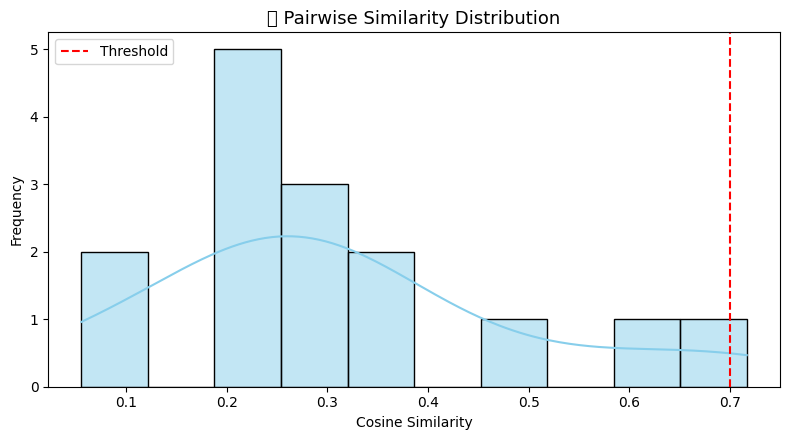

In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr, spearmanr

# ⚙️ Load model
model = SentenceTransformer("ritulk/MPNET-fine-tuned-political-clustering")

# 📰 News headlines
sentences = [
    'India Gets Rafale Boost, Rs 63,000-Crore Deal Cleared For 26 Navy Fighters',
    'China says it will continue to take ‘resolute and forceful’ countermeasures as U.S. tariffs kick in',
    '3 dead, 3 injured in mass shooting in Virginia',
    'Mass shooting in Chicago leaves several injured and dead',
    'France Approves New Fighter Jet Purchase Amid Rising Tensions',
    'US-China Trade War Intensifies as New Tariffs Imposed'
]

# 🔢 Generate embeddings
embeddings = model.encode(sentences, convert_to_tensor=True)
similarity_matrix = util.cos_sim(embeddings, embeddings).cpu().numpy()

# 🧠 Clustering
distance_matrix = 1 - similarity_matrix
n_clusters = 3
clustering_model = AgglomerativeClustering(metric='precomputed', linkage='average', n_clusters=n_clusters)
labels = clustering_model.fit_predict(distance_matrix)

# 📌 Show cluster assignments
print("\n📊 Cluster Assignments:")
for sentence, label in zip(sentences, labels):
    print(f"[Cluster {label}] {sentence}")

# 📈 Plot 1: Similarity Heatmap with shortened labels
short_labels = [s[:35] + '...' if len(s) > 35 else s for s in sentences]
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='YlGnBu',
            xticklabels=short_labels, yticklabels=short_labels,
            annot_kws={"size": 9}, fmt=".2f")
plt.title("🟨 Headline Similarity Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 🌌 Plot 2: t-SNE Cluster Visualization
# tsne = TSNE(n_components=2, random_state=42, perplexity=5)
# reduced = tsne.fit_transform(embeddings.cpu().numpy())

# plt.figure(figsize=(10, 6))
# palette = sns.color_palette("Set2", n_colors=n_clusters)
# for idx in range(n_clusters):
#     points = reduced[np.array(labels) == idx]
#     plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {idx}', s=100, alpha=0.8)

# # Add short annotations
# for i, txt in enumerate(sentences):
#     short_text = txt[:35] + "..." if len(txt) > 35 else txt
#     plt.annotate(short_text, (reduced[i, 0]+0.5, reduced[i, 1]), fontsize=8)

# plt.title("🌐 t-SNE Visualization of News Clusters", fontsize=14)
# plt.legend()
# plt.tight_layout()
# plt.show()

# 📊 Extra Statistics

# Flatten upper triangle of similarity matrix
upper_tri_idx = np.triu_indices_from(similarity_matrix, k=1)
similarity_scores = similarity_matrix[upper_tri_idx]

# Ground-truth similarities (manual for evaluation)
ground_truth = [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

# Thresholding
threshold = 0.70
predicted = [1 if score >= threshold else 0 for score in similarity_scores]

# Accuracy
accuracy = accuracy_score(ground_truth, predicted)

# Correlation scores
pearson_corr, _ = pearsonr(ground_truth, similarity_scores)
spearman_corr, _ = spearmanr(ground_truth, similarity_scores)

# 📋 Print statistics
print("\n📐 Similarity Matrix (rounded):\n", np.round(similarity_matrix, 3))
print("🔺 Threshold:", threshold)
print("✅ Accuracy:", round(accuracy, 3))
print(f"📈 Pearson Correlation: {pearson_corr:.4f}")
print(f"📉 Spearman Correlation: {spearman_corr:.4f}")

# 📊 Plot similarity distribution
plt.figure(figsize=(8, 4.5))
sns.histplot(similarity_scores, bins=10, kde=True, color="skyblue")
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title("📊 Pairwise Similarity Distribution", fontsize=13)
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


# **Dataset Stats**

 Dataset Shape: (2073, 4)

 Columns: ['id', 'sentence_1', 'sentence_2', 'label']

 Sample Rows:
            id                                         sentence_1  \
0    ACN2_111  Atorga per primer cop les mencions Encarna San...   
1  Oscar2_211  Finalment, afegiu-hi els bolets que haureu sal...   
2    ACN2_574  El TC suspèn el pla d'acció exterior i de rela...   
3  Viqui2_341  Virgin Galactic va ser fundada el 2004 per l'e...   
4   ACN2_1184  Identifiquen un nou biomarcador per realitzar ...   

                                          sentence_2  label  
0  Creen la menció M. Encarna Sanahuja a la inclu...   3.50  
1  Finalment, poseu-hi les minipastanagues tallad...   1.25  
2  El Constitucional manté la suspensió del pla e...   3.67  
3  Virgin Atlantic és una de les aerolínies de Ri...   2.25  
4          Nous tractaments contra el càncer de mama   2.00  

 Null Values:
 id            0
sentence_1    0
sentence_2    0
label         0
dtype: int64

 Label Distribution (Similar

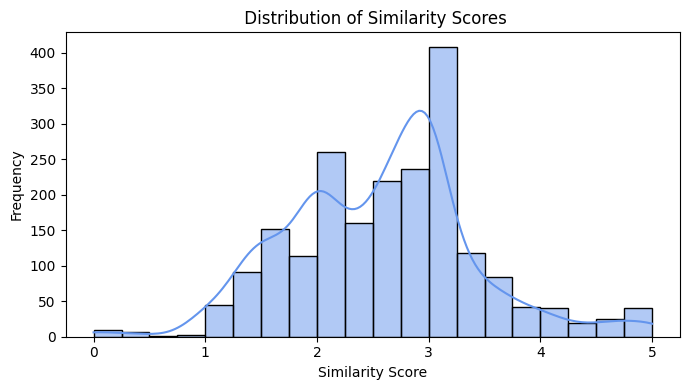

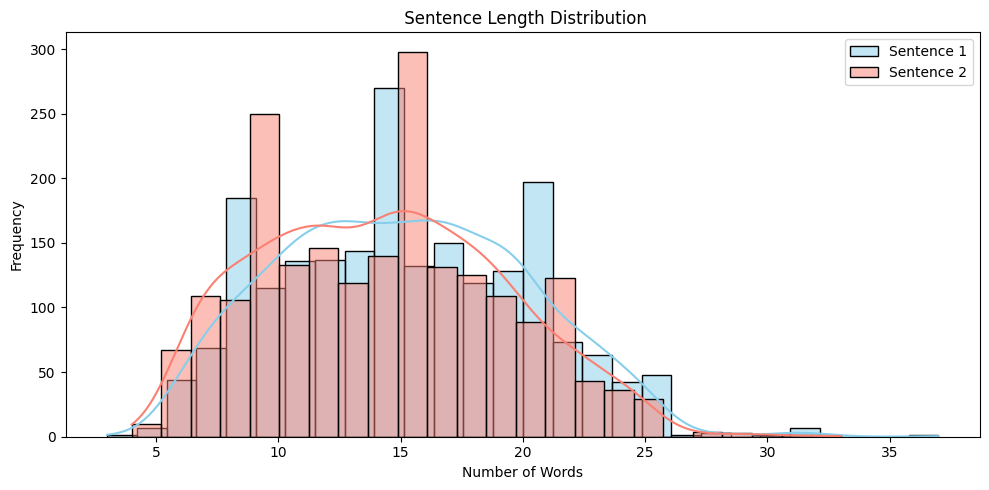

In [ ]:
#  Install required library
!pip install datasets

#  Import Libraries
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Load dataset
ds = load_dataset("projecte-aina/sts-ca", split='train')

# 🧾 Convert to DataFrame
df = pd.DataFrame(ds)

# 🔍 Basic Exploration
print(" Dataset Shape:", df.shape)
print("\n Columns:", df.columns.tolist())
print("\n Sample Rows:\n", df.head())

# 🔎 Null Check
print("\n Null Values:\n", df.isnull().sum())

# 🧭 Label Distribution (Similarity Scores)
if 'label' in df.columns:
    label_counts = df['label'].value_counts().sort_index()
    print("\n Label Distribution (Similarity Scores):\n", label_counts)
    print("\n Similarity Score Stats:\n", df['label'].describe())
else:
    print("\n 'label' column not found!")

# ✂️ Sentence Length Analysis
df['sent1_len'] = df['sentence_1'].apply(lambda x: len(str(x).split()))
df['sent2_len'] = df['sentence_2'].apply(lambda x: len(str(x).split()))

print("\n Average Sentence Lengths:")
print("Sentence 1:", df['sent1_len'].mean())
print("Sentence 2:", df['sent2_len'].mean())

# 📊 Plot 1: Similarity Score Distribution
plt.figure(figsize=(7, 4))
sns.histplot(df['label'], bins=20, kde=True, color="cornflowerblue")
plt.title(" Distribution of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 📊 Plot 2: Sentence Lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['sent1_len'], color='skyblue', label='Sentence 1', kde=True)
sns.histplot(df['sent2_len'], color='salmon', label='Sentence 2', kde=True)
plt.title(" Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# 🧭 Bias / Leaning Column Check
if 'bias' in df.columns:
    print("\n Bias Breakdown:")
    print(df['bias'].value_counts())


 Dataset Shape: (5749, 3)

 Columns: ['sentence1', 'sentence2', 'similarity_score']

 Sample Rows:
                                            sentence1  \
0                       Ein Flugzeug hebt gerade ab.   
1                  Ein Mann spielt eine große Flöte.   
2  Ein Mann streicht geriebenen Käse auf eine Pizza.   
3                        Drei Männer spielen Schach.   
4                             Ein Mann spielt Cello.   

                                           sentence2  similarity_score  
0                       Ein Flugzeug hebt gerade ab.              5.00  
1                        Ein Mann spielt eine Flöte.              3.80  
2  Ein Mann streicht geriebenen Käse auf eine ung...              3.80  
3                        Zwei Männer spielen Schach.              2.60  
4                   Ein sitzender Mann spielt Cello.              4.25  

 Null Values:
 sentence1           0
sentence2           0
similarity_score    0
dtype: int64

 Label Distribution (Similari

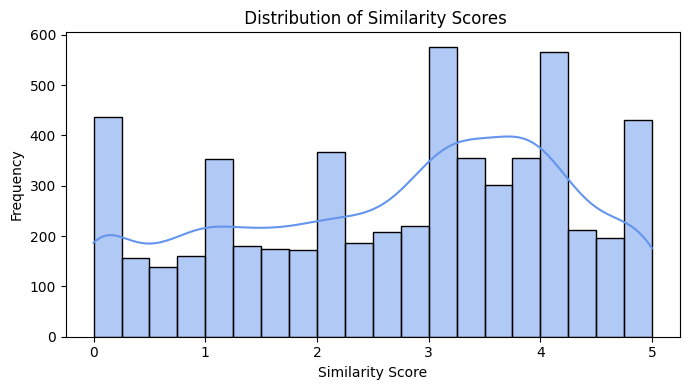

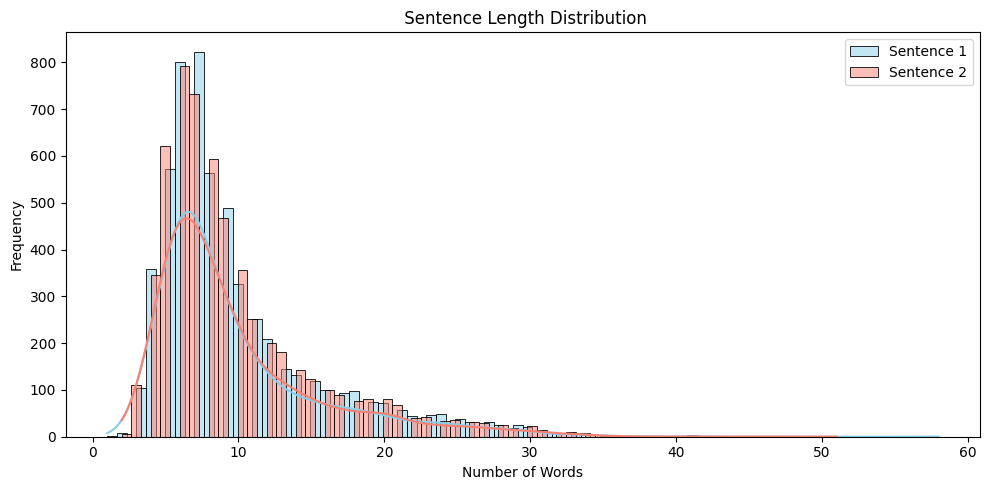

In [ ]:
#  Install required library
!pip install datasets

#  Import Libraries
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Load dataset
ds = load_dataset("PhilipMay/stsb_multi_mt",'de', split='train')

# 🧾 Convert to DataFrame
df = pd.DataFrame(ds)

# 🔍 Basic Exploration
print(" Dataset Shape:", df.shape)
print("\n Columns:", df.columns.tolist())
print("\n Sample Rows:\n", df.head())

# 🔎 Null Check
print("\n Null Values:\n", df.isnull().sum())

# 🧭 Label Distribution (Similarity Scores)
if 'similarity_score' in df.columns:
    label_counts = df['similarity_score'].value_counts().sort_index()
    print("\n Label Distribution (Similarity Scores):\n", label_counts)
    print("\n Similarity Score Stats:\n", df['similarity_score'].describe())
else:
    print("\n 'label' column not found!")

# ✂️ Sentence Length Analysis
df['sentence1_len'] = df['sentence1'].apply(lambda x: len(str(x).split()))
df['sentence2_len'] = df['sentence2'].apply(lambda x: len(str(x).split()))

print("\n Average Sentence Lengths:")
print("Sentence 1:", df['sentence1_len'].mean())
print("Sentence 2:", df['sentence2_len'].mean())

# 📊 Plot 1: Similarity Score Distribution
plt.figure(figsize=(7, 4))
sns.histplot(df['similarity_score'], bins=20, kde=True, color="cornflowerblue")
plt.title(" Distribution of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 📊 Plot 2: Sentence Lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['sentence1_len'], color='skyblue', label='Sentence 1', kde=True)
sns.histplot(df['sentence2_len'], color='salmon', label='Sentence 2', kde=True)
plt.title(" Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# 🧭 Bias / Leaning Column Check
if 'bias' in df.columns:
    print("\n Bias Breakdown:")
    print(df['bias'].value_counts())
